In [15]:
from ultralytics import YOLO

In [76]:
model_path = 'best_part2.pt'

model = YOLO(model_path)

img_path = 'testset1/images/IMG_3960_iter_3.jpg'

In [77]:
results = model(img_path)

for result in results:
    result.show(labels=False) 


image 1/1 c:\Users\Cam\OneDrive - VNU-HCMUS\Documents\GitHub\AIC2024-autograde\testset1\images\IMG_3960_iter_3.jpg: 1024x736 32 ticks, 32 not_ticks, 1778.8ms
Speed: 114.3ms preprocess, 1778.8ms inference, 72.5ms postprocess per image at shape (1, 3, 1024, 736)


In [79]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [80]:
result = results[0]

boxes = result.boxes.xywhn

labels = result.boxes.cls

conf = result.boxes.conf

sorted_result = result[np.argsort(boxes[:, 1])]
# sorted_boxes = boxes[np.argsort(boxes[:, 0])]
# sorted_labels = labels[np.argsort(boxes[:, 0])]

# final_sorted_boxes = []
# for i in range(0, len(sorted_boxes), 16):
#     cluster = sorted_boxes[i:i + 16]
#     cluster_sorted = cluster[np.argsort(cluster[:, 0])]
#     final_sorted_boxes.append(cluster_sorted)

# final_sorted_boxes = np.vstack(final_sorted_boxes)

print(sorted_result.boxes.xywhn)
print(sorted_result.boxes.cls)


tensor([[0.5874, 0.6036, 0.0192, 0.0139],
        [0.4566, 0.6036, 0.0195, 0.0141],
        [0.4099, 0.6036, 0.0194, 0.0139],
        [0.9046, 0.6037, 0.0191, 0.0135],
        [0.6338, 0.6038, 0.0191, 0.0139],
        [0.3628, 0.6038, 0.0194, 0.0139],
        [0.8583, 0.6039, 0.0195, 0.0135],
        [0.5407, 0.6040, 0.0190, 0.0136],
        [0.6812, 0.6040, 0.0197, 0.0141],
        [0.3155, 0.6041, 0.0192, 0.0139],
        [0.8112, 0.6045, 0.0189, 0.0134],
        [0.7654, 0.6048, 0.0196, 0.0138],
        [0.2314, 0.6052, 0.0199, 0.0142],
        [0.1833, 0.6061, 0.0196, 0.0140],
        [0.1356, 0.6067, 0.0197, 0.0142],
        [0.0880, 0.6073, 0.0193, 0.0139],
        [0.9048, 0.6187, 0.0192, 0.0130],
        [0.4563, 0.6187, 0.0188, 0.0132],
        [0.4098, 0.6190, 0.0194, 0.0133],
        [0.5408, 0.6191, 0.0190, 0.0133],
        [0.5876, 0.6191, 0.0191, 0.0136],
        [0.3627, 0.6192, 0.0189, 0.0133],
        [0.6338, 0.6193, 0.0194, 0.0134],
        [0.6809, 0.6195, 0.0197, 0

In [84]:
print(sorted_result.boxes.xywhn[0])
print(sorted_result.boxes.xywhn[16])
print(sorted_result.boxes.xywhn[32])
print(sorted_result.boxes.xywhn[48])

tensor([0.5874, 0.6036, 0.0192, 0.0139])
tensor([0.9048, 0.6187, 0.0192, 0.0130])
tensor([0.4565, 0.6334, 0.0190, 0.0133])
tensor([0.4565, 0.6484, 0.0195, 0.0134])


In [75]:
minus_sign = {boxes: result.boxes.xywhn}
for i in range(6):
    minus_sign.append([result.boxes.xywhn[i], result.boxes.cls[i]])
# minus_sign = np.array(minus_sign)
minus_sign

[[tensor([0.5404, 0.7708, 0.0196, 0.0136]), tensor(1.)],
 [tensor([0.5851, 0.7715, 0.0191, 0.0133]), tensor(1.)],
 [tensor([0.5402, 0.8164, 0.0191, 0.0131]), tensor(0.)],
 [tensor([0.4547, 0.8171, 0.0190, 0.0129]), tensor(1.)],
 [tensor([0.6063, 0.8309, 0.0190, 0.0132]), tensor(1.)],
 [tensor([0.7563, 0.8151, 0.0186, 0.0133]), tensor(0.)]]

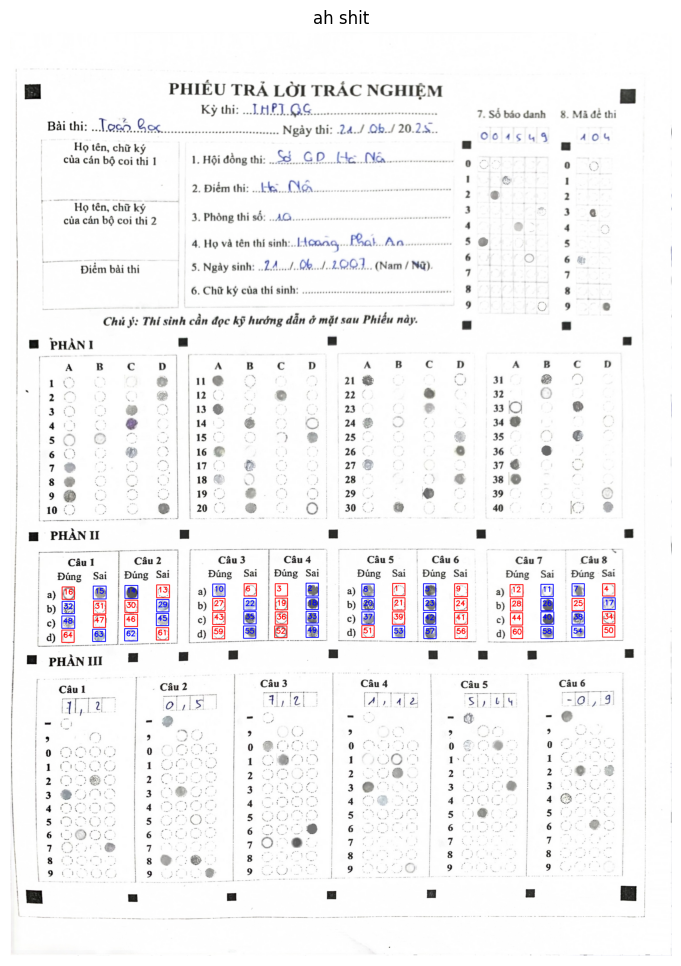

In [81]:
original_image = cv2.imread(img_path)

image_height, image_width = original_image.shape[:2]

image_with_boxes = original_image.copy()

# last_16_boxes = sorted_boxes[-16:]

for idx, box in enumerate(sorted_result.boxes.xywhn):
    x_center = int(box[0] * image_width)
    y_center = int(box[1] * image_height)
    box_width = int(box[2] * image_width)
    box_height = int(box[3] * image_height)
    
    x_min = x_center - box_width // 2
    y_min = y_center - box_height // 2
    x_max = x_center + box_width // 2
    y_max = y_center + box_height // 2
    
    color = [(255, 0, 0), (0, 0, 255)]
    cv2.rectangle(image_with_boxes, (x_min, y_min), (x_max, y_max), color[int(sorted_result.boxes.cls[idx])], 2)
    
    cv2.putText(
        image_with_boxes, 
        str(idx + 1), 
        (x_min + 5, y_min + 25),
        cv2.FONT_HERSHEY_SIMPLEX, 
        0.8,
        color[int(sorted_result.boxes.cls[idx])],
        2
    )

image_rgb = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("ah shit")
plt.show()